## Load the data



In [ ]:
import pandas as pd

df = pd.read_csv("/content/Salary Data.csv")
display(df.head())

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## Preprocessing



In [ ]:
print("Missing values before handling:")
print(df.isnull().sum())


for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

categorical_cols = df.select_dtypes(include=['object']).columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

Missing values before handling:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

Missing values after handling:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


/tmp/ipython-input-11-2095929556.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,Age,Years of Experience,Salary,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,90000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,28.0,3.0,65000.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,15.0,150000.0,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,7.0,60000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,20.0,200000.0,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (300, 178)
Shape of X_test: (75, 178)
Shape of y_train: (300,)
Shape of y_test: (75,)


## Exploratory data analysis (eda)


,Age,Years of Experience,Salary
count,375.000000,375.000000,375.000000
mean,37.431635,10.030831,100577.345845
std,7.050146,6.539452,48110.856588
min,23.000000,0.000000,350.000000
25%,31.500000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


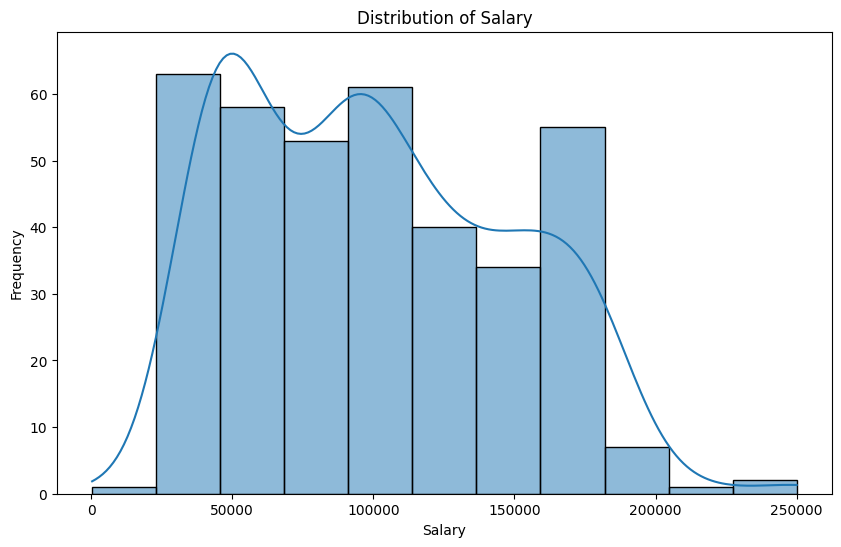

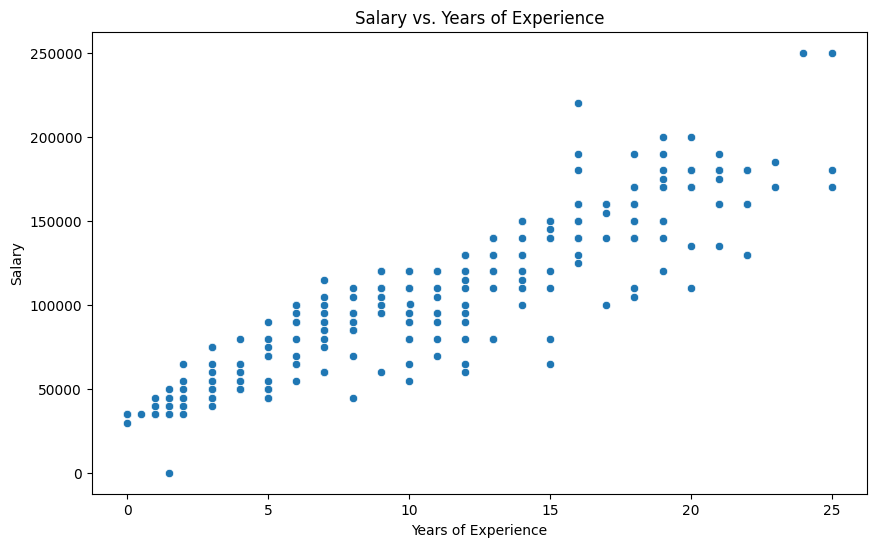

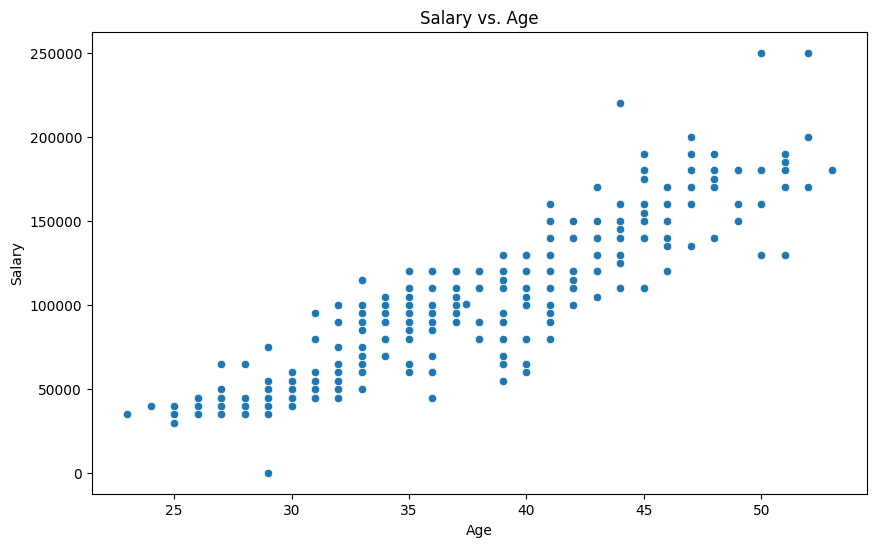

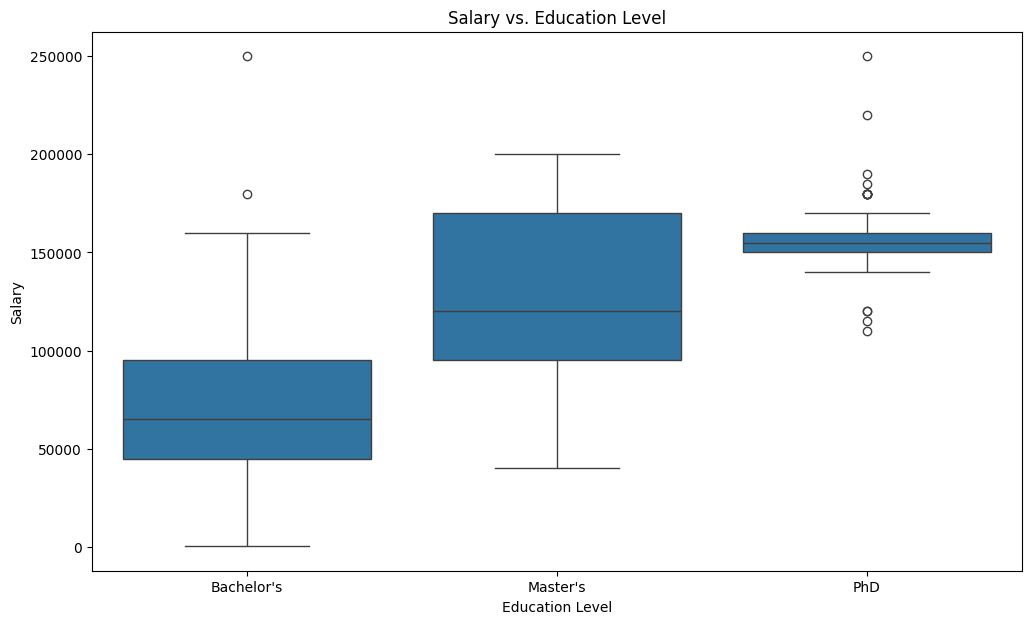

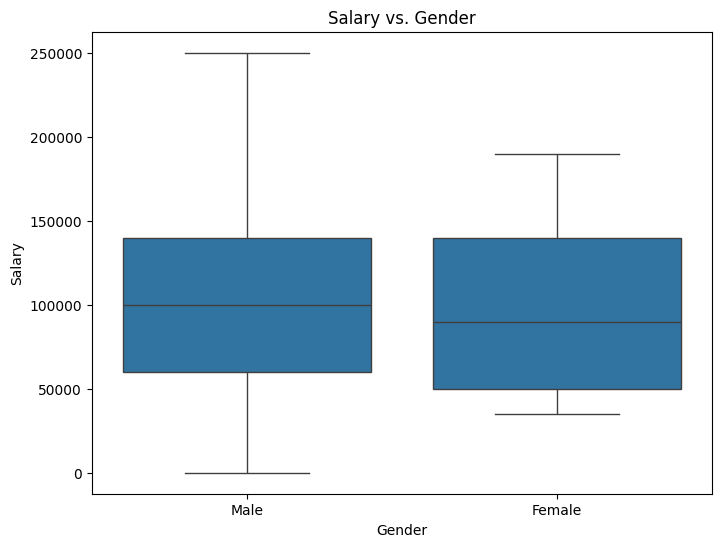

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

display(df.describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Salary', data=df)
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Salary vs. Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

plt.figure(figsize=(12, 7))
sns.boxplot(x='Education Level', y='Salary', data=df)
plt.title('Salary vs. Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

## Model training


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
from sklearn.svm import SVR
svm_model = SVR()
\svm_model.fit(X_train, y_train)

SVR()

## Model evaluation


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_predictions = rf_model.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

metrics = {}

metrics['Random Forest'] = {
    'MAE': mean_absolute_error(y_test, rf_predictions),
    'MSE': mean_squared_error(y_test, rf_predictions),
    'R-squared': r2_score(y_test, rf_predictions)
}

metrics['Gradient Boosting'] = {
    'MAE': mean_absolute_error(y_test, gbm_predictions),
    'MSE': mean_squared_error(y_test, gbm_predictions),
    'R-squared': r2_score(y_test, gbm_predictions)
}

metrics['SVM'] = {
    'MAE': mean_absolute_error(y_test, svm_predictions),
    'MSE': mean_squared_error(y_test, svm_predictions),
    'R-squared': r2_score(y_test, svm_predictions)
}

display(metrics)

{'Random Forest': {'MAE': 10440.637587131367,
  'MSE': 266123926.359561,
  'R-squared': 0.890144802322674},
 'Gradient Boosting': {'MAE': 10182.84823687547,
  'MSE': 281730477.41267955,
  'R-squared': 0.8837024625659502},
 'SVM': {'MAE': 40723.10491232733,
  'MSE': 2462299969.308325,
  'R-squared': -0.016430403569843266}}

## Comparison of metrics



In [ ]:
for model_name, model_metrics in metrics.items():
    print(f"--- {model_name} ---")
    print(f"Mean Absolute Error (MAE): {model_metrics['MAE']:.2f}")
    print(f"Mean Squared Error (MSE): {model_metrics['MSE']:.2f}")
    print(f"R-squared: {model_metrics['R-squared']:.2f}")
    print("-" * (len(model_name) + 6))

--- Random Forest ---
Mean Absolute Error (MAE): 10440.64
Mean Squared Error (MSE): 266123926.36
R-squared: 0.89
-------------------
--- Gradient Boosting ---
Mean Absolute Error (MAE): 10182.85
Mean Squared Error (MSE): 281730477.41
R-squared: 0.88
-----------------------
--- SVM ---
Mean Absolute Error (MAE): 40723.10
Mean Squared Error (MSE): 2462299969.31
R-squared: -0.02
---------


## Graphical representation



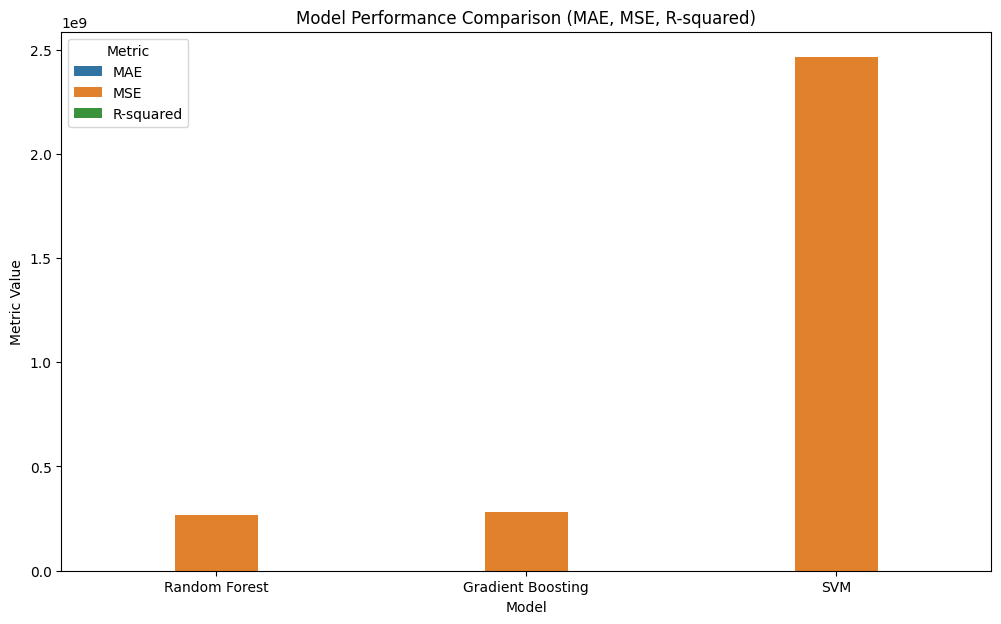

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

metrics_df = pd.DataFrame.from_dict(metrics, orient='index').reset_index()
metrics_df = metrics_df.rename(columns={'index': 'Model'})

melted_metrics = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Value', hue='Metric', data=melted_metrics)
plt.title('Model Performance Comparison (MAE, MSE, R-squared)')
plt.ylabel('Metric Value')
plt.show()

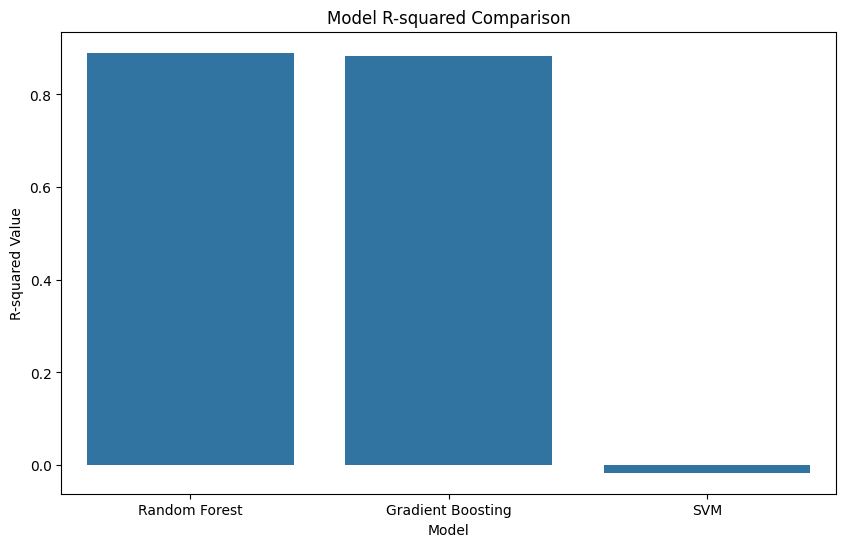

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Value', data=melted_metrics[melted_metrics['Metric'] == 'R-squared'])
plt.title('Model R-squared Comparison')
plt.ylabel('R-squared Value')
plt.show()